In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import fm2p

Loading DLC 2.3.7...
DLC loaded in light mode; you cannot use any GUI (labeling, relabeling and standalone GUI)


c:\Users\dmartins\anaconda3\envs\fm1\lib\site-packages\oasis\functions.py:13: UserWarning: Could not find cvxpy. Don't worry, you can still use OASIS, just not the slower interior point methods we compared to in the papers.
  warn("Could not find cvxpy. Don't worry, you can still use OASIS, " +


In [3]:
# plot behavioral occupancy
data = fm2p.read_h5(r'K:\Mini2P\250306_DMM_DMM038_pillar\fm1\250306_DMM_DMM038_fm_1_preproc.h5')

In [42]:
data['twopT'][-1]/60

26.804444444444446

In [36]:
ego_bins = np.linspace(-180, 180, 36)
retino_bins = np.linspace(-180, 180, 36)
pupil_bins = np.linspace(50, 100, 10)

speed = data['speed'].copy()
speed = np.append(speed, speed[-1])
use = speed > 2.

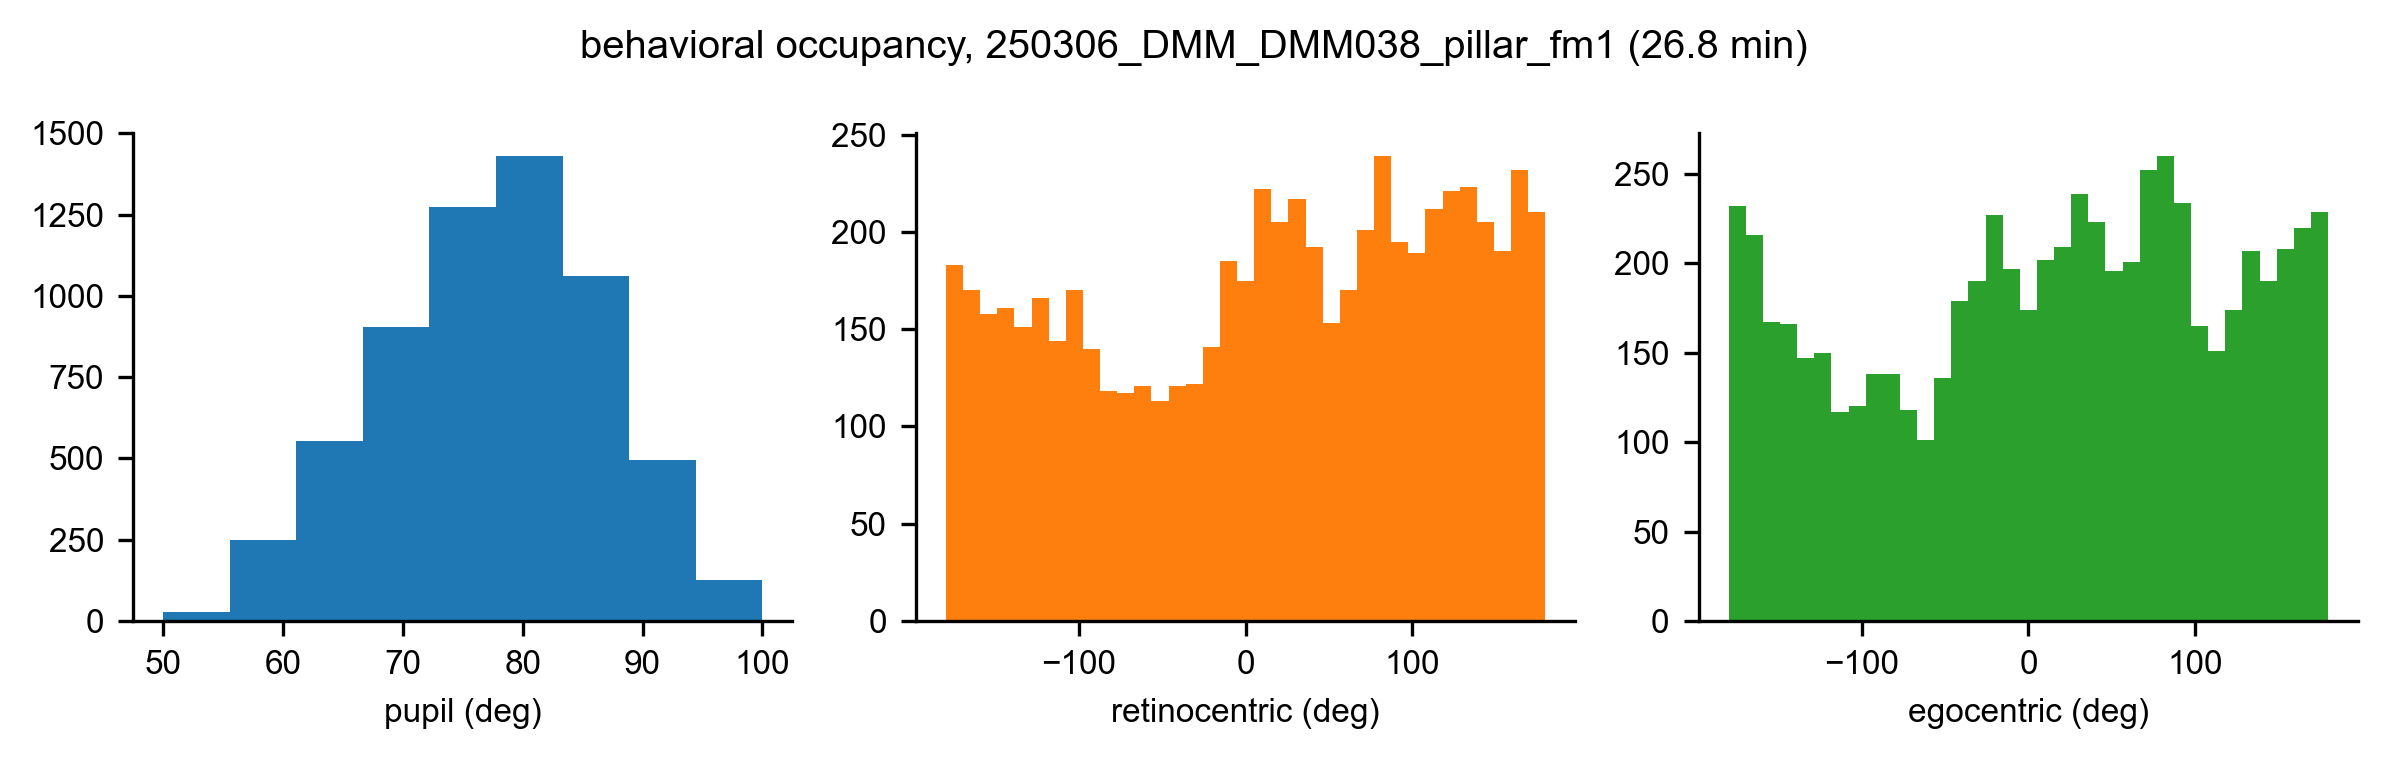

In [43]:
fig, [ax1,ax2,ax3] = plt.subplots(1, 3, dpi=300, figsize=(8,2.5))
ax1.hist(data['pupil_from_head'][use], bins=pupil_bins, color='tab:blue')
ax1.set_xlabel('pupil (deg)')
ax2.hist(data['retinocentric'][use], bins=retino_bins, color='tab:orange')
ax2.set_xlabel('retinocentric (deg)')
ax3.hist(data['egocentric'][use], bins=ego_bins, color='tab:green')
ax3.set_xlabel('egocentric (deg)')
fig.suptitle('behavioral occupancy, 250306_DMM_DMM038_pillar_fm1 (26.8 min)')
fig.tight_layout()

In [2]:
model_results = fm2p.read_models(r'K:\Mini2P\250306_DMM_DMM038_pillar\fm1\fm_fit_v01_lag_0')